In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional,LSTM,TextVectorization,Dense,Embedding,Dropout,BatchNormalization,GRU,Attention,Embedding
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/sentiment/cleaned_comment_part1.csv")
df_2=pd.read_csv(r"/content/drive/MyDrive/sentiment/sixemo.csv")
df_3=pd.read_csv(r"/content/drive/MyDrive/sentiment/train_500k1th.csv")
df_4=pd.read_csv(r"/content/drive/MyDrive/sentiment/cleaned_comment_part2.csv")

In [ ]:
df_4=pd.read_csv(r"/content/drive/MyDrive/sentiment/cleaned_comment_part2.csv")

In [ ]:
df=df['text']
df_4=df_4['text']
df_2=df_2['tweet']
df_3=df_3["Comment"]

In [ ]:
dataset = pd.concat([df, df_2, df_3,df_4], ignore_index=True)#df_4 remember

In [ ]:
dataset

,text
0,Gorgeous
1,وای چقدر پرایمر خفنی بود عالی بود
2,به نظرم بیا محصولات دراگ استوری که توی ایران ه...
3,خیلی عالی و خفن بودمرسی از نقد ومعرفی خفنت
4,صدف یه ویدیو در مودر لوازم آرایش مک و دیور بزا...
...,...
4696680,شاد: شبکه آموزشی دانش آموزان
4696681,شاد یه اپ شخمی مثل تلگرامه که کلا بالا نمیاد \...
4696682,ما هروز داریم با شاد پیر میشیم میگی شاد چیه؟
4696683,شاد:شبکه اموزشی دانش آموز


In [ ]:
dataset=dataset.to_frame(name='text')

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/sentiment/dataset.csv")
shuffled = df.sample(frac=1)

In [ ]:
df=pd.read_csv("dataset - Copy.csv")
shuffled = df.sample(frac=1)

In [ ]:
df=df.dropna()

In [ ]:
shuffled = dataset.sample(frac=1)

In [ ]:
shuffled = shuffled.dropna()
# shuffled = shuffled.astype(str)

In [ ]:
shuffled

,text,sentiment
206709,برای بازی کردن با گربم خریدم.‌بعد از ۲ ۳ بار ا...,-1
50473,ساعت۱۲شب \nساختمان۴\nطبقه۲\nبخش #کرونا #بیمارس...,-1
54696,با رای دادن انتقام خون شهدا را از دشمنان بگیری...,-1
128059,بارها این نجوا را شنیده ام که می گوید: ای حرمت...,-1
236454,سلام خداییش با این قیمت ارزش خرید داره کیفیتش ...,1
...,...,...
172179,عالی خیلی خوب جنسش عالیه,1
66872,دیگه بعد این پیروزی فحش نمیدم\nخوشحالم الان😊😊...,-1
319609,داشتنِ چیزی برای گفتن و نبودنِ کسی برای شنیدن،...,-1
339290,قربونتون برم که لحظه‌ای غافل از شیعه‌خانَتون ن...,1


In [ ]:
X = shuffled.iloc[:,0].values
Y = shuffled.iloc[:,1].values

In [ ]:
X[5]

'این کلاب #ایران_من هم دیگه شورش رو درآورده. دیگه چرا هی اون کلیپ دوباره ایران رو پخش می\u200cکنید و دل همه رو به درد میارید؟ ول کنید دیگه. هربار این کار رو می\u200cکنید تمام اون حس\u200cهای افسردگی و سرخوردگی رو میارید جلوی چشممون.'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
#Y = Y.reshape(len(Y), 1)
Y_enc = onehot_encoder.fit_transform(Y.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_enc, test_size=0.1,random_state = 105)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# tkn = Tokenizer()
# tkn.fit_on_texts(X)
# seq = tkn.texts_to_sequences(X)
tkn = Tokenizer()
tkn.fit_on_texts(X)

In [ ]:
seq

[[231,
  78,
  89,
  78,
  145,
  16,
  53,
  178,
  66,
  4,
  123,
  236,
  78,
  16,
  78,
  9,
  96,
  182,
  96,
  167,
  96,
  197,
  96,
  117,
  167,
  29,
  7,
  21,
  57,
  57,
  70,
  1,
  182,
  178,
  141,
  72,
  129,
  57,
  57,
  57,
  57,
  57,
  57,
  28,
  1,
  24,
  72,
  21,
  3,
  117,
  4,
  57,
  51,
  78,
  20,
  15,
  86,
  27,
  59,
  32,
  89,
  16,
  9,
  16,
  141,
  43,
  197],
 [1,
  190,
  49,
  49,
  171,
  62,
  163,
  49,
  7,
  49,
  237,
  8,
  241,
  24,
  118,
  49,
  49,
  49,
  4,
  26,
  105,
  49,
  49,
  49,
  49,
  115,
  7,
  225,
  174,
  49,
  1,
  7,
  118,
  49,
  91,
  91,
  91,
  16,
  37,
  16,
  22,
  70,
  14,
  115,
  49,
  49,
  49,
  49,
  49,
  92,
  241,
  49,
  241,
  49,
  174,
  124,
  49,
  171,
  232,
  85,
  14,
  1,
  212,
  49,
  105,
  1,
  212,
  49,
  1,
  212,
  49,
  138,
  49,
  49,
  232,
  137,
  49,
  1,
  232,
  212,
  212,
  1,
  212,
  117,
  231,
  24],
 [150,
  216,
  150,
  216,
  91,
  42,
  4,
  22,
 

In [ ]:
import pickle
tkn=pickle.load(open('/content/drive/MyDrive/sentiment/word2vec_test_tkn.sav', 'rb'))

In [ ]:
seq = tkn.texts_to_sequences(X_train)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)
print(padded_docs)

[[      0       0       0 ...     149     168 1230574]
 [      0       0       0 ...     149     168 1197103]
 [      0       0       0 ...       3   86494    3156]
 ...
 [      0       0       0 ...      10     259    7564]
 [      0       0       0 ...       4     202      42]
 [      0       0       0 ...     149     168  730363]]


In [ ]:
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

def train_fasttext_emb(corpus):
    sentences = [[word for word in word_tokenize(text)] for text in corpus]
    emb_model = Word2Vec(sentences, vector_size=100, window = 30, min_count=1)
    emb_model.build_vocab(sentences, update=True)
    emb_model.train(sentences, total_examples=len(corpus), epochs=30)
    #emb_model.save(FT_EMBEDDING_PATH)
    return emb_model
emb_model=train_fasttext_emb(X)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from gensim.models import KeyedVectors


# emb_model = train_fasttext_emb(X_train)


#loading the trained wordvectors


wv = KeyedVectors.load("/content/drive/MyDrive/sentiment/word2vec_test.wordvectors", mmap='r')
# wv=emb_model.wv

#len(wv[0]) hyper paramter ast
def get_emb_matrix(wv):
    embedding_matrix = np.random.random((len(tkn.word_index)+1, 100))
    pas = 0
    for word,i in tkn.word_index.items():
        try:
            embedding_matrix[i] = wv[word]
        except:
            print(word)
            pas+=1
    return embedding_matrix

embedding_matrix = get_emb_matrix(wv)

Streaming output truncated to the last 5000 lines.
petn0mnvqw
u0n1mjoqpq
a3rozvuwpi
20150528
finalists
ocid
twert …
thnq
 alipakman 
l´m
khodefafar 
طلبان»»
wtcje8yqua
eevtmxeafw
dfykdt1wj4
zqs4ka 
bnazmmmmmm
cheghadddddr
45رمز
qalamrov
momeni7091 
preußenstraße
rwcbod2b4k
khoooooobbbyyyyyy
frf0dmgfo8
fh4ocfvcam
fivb
«هواوی»
«تاسیسات
حساس»
hosseinnmn4356 
idkema 
37نگاه
jisooوroze
a2w5jhqpq3
богдан
gfpatiyne9
amorescinema
1118562032847028227 …
znese6auae
amiros
tatqpuvlht
11بسهههه
55پوکیدمآگه
sabahipor 
نکردی1
mohammadmahdiamiri4444 
jm3qmckcj5
e2spxgljyo
روسيه2018،
krdbjpw6at
nabia
l4fkryaw8s
istpعم
kta9ig75hj
 هرچقدر
8gguxoimzt
63ispnxdic
fereshtealawi6131 
dozp4drhmt
شهری،بویژه
pepejammer
tea 
nayom
mykop
2gqykyt9tl
bf9qw3uc6u 
6tw6l46omb
wjw49tdhmp
nazdana
40دقیفه
oy9rwxjcl8
“concours”
برسیم 
alip00rangbar75 
i2ifcgu3o6
vhsgqtmu8j
ab6jg2ww2q
velogkhli
که«امیدی
کرد»هیچکدام
2r8e6rdwn 
پشتكاربياموزيم
albqpwy3jj
nerurboxcv
❣️🇦🇫
wyrcrdnqvk
gheiraty
aminastrixxx  kid
hafyekb2x6
باشد☝
pun

In [ ]:
wv.similar_by_word("ریاضی")

[('شیمی', 0.7944443821907043),
 ('فیزیک', 0.7674172520637512),
 ('ریاضیم', 0.7545579075813293),
 ('علوم', 0.7454295754432678),
 ('امتحانم', 0.7054042816162109),
 ('کنکور', 0.693311870098114),
 ('ریاضیو', 0.6931450366973877),
 ('تجربی', 0.6797916889190674),
 ('نهم', 0.6604676842689514),
 ('عربی', 0.650054931640625)]

In [ ]:
from tensorflow.keras.models import Sequential
from keras.regularizers import l2
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,GRU
embedding_vector_features = 100
model_1 = Sequential()
model_1.add(Embedding(embedding_matrix.shape[0],embedding_vector_features, weights=[embedding_matrix], input_length=max_len,trainable=False))
model_1.add(Bidirectional(GRU(128,dropout=0.25,recurrent_dropout=0.2,return_sequences=True)))
model_1.add(Bidirectional(GRU(64,return_sequences=False)))
model_1.add(Dropout(0.1))
model_1.add(Dense(32,activation="relu"))
model_1.add(Dense(16,activation="relu"))
model_1.add(Dense(3,activation='softmax'))
model_1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          133381700 
                                                                 
 bidirectional (Bidirection  (None, 100, 256)          176640    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               123648    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
history_1=model_1.fit(padded_docs,Y_train,batch_size=256,epochs=2, validation_split=0.1)

Epoch 1/2
1211/1211 [==============================] - 1921s 2s/step - loss: 0.4205 - accuracy: 0.8194 - val_loss: 0.3360 - val_accuracy: 0.8558
Epoch 2/2
1211/1211 [==============================] - 1951s 2s/step - loss: 0.3450 - accuracy: 0.8521 - val_loss: 0.3198 - val_accuracy: 0.8613


In [ ]:
history_2=model_1.fit(padded_docs,Y_train,batch_size=1024,epochs=2, validation_split=0.1)

Epoch 1/2
303/303 [==============================] - 1404s 5s/step - loss: 0.3270 - accuracy: 0.8595 - val_loss: 0.3138 - val_accuracy: 0.8639
Epoch 2/2
303/303 [==============================] - 1378s 5s/step - loss: 0.3221 - accuracy: 0.8615 - val_loss: 0.3146 - val_accuracy: 0.8644


In [ ]:
history_2=model_1.fit(padded_docs,Y_train,batch_size=1024,epochs=2, validation_split=0.1)

Epoch 1/2
303/303 [==============================] - 1409s 5s/step - loss: 0.3183 - accuracy: 0.8627 - val_loss: 0.3100 - val_accuracy: 0.8659
Epoch 2/2
303/303 [==============================] - 1387s 5s/step - loss: 0.3155 - accuracy: 0.8643 - val_loss: 0.3083 - val_accuracy: 0.8662


In [ ]:
model_1.save(r"/content/drive/MyDrive/sentiment/model_sentiment_V1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras
model_x=keras.models.load_model(r"/content/drive/MyDrive/sentiment/model_sentiment_V1.h5")

In [ ]:
import keras
import pickle
model_x=keras.models.load_model(r"/content/drive/MyDrive/sentiment/model_14M_V1.h5")
tkn=pickle.load(open('/content/drive/MyDrive/sentiment/word2vec_14M_tkn.sav', 'rb'))

In [ ]:
model_x.predict(test_padded)

1/1 [==============================] - 1s 885ms/step


array([[0.7082174 , 0.00356366, 0.288219  ]], dtype=float32)

In [ ]:
import keras
# model_x=keras.models.load_model(r"/content/drive/MyDrive/sentiment/model_sentiment_V1.h5")
from tensorflow.keras.preprocessing.sequence import pad_sequences
text= """
من ارشد قبول شدم
"""
text_seq = tkn.texts_to_sequences([text])
test_padded = pad_sequences(text_seq, maxlen = 100)
result=model_x.predict(test_padded)
print(result)
sentiment(result)

1/1 [==============================] - 0s 194ms/step
[[0.1165582  0.44638547 0.4370563 ]]
positive


In [ ]:
چند نفر اخراج شدند



In [ ]:
def sentiment(result):
  positive_percentage = result[0][2]
  neutral_percentage = result[0][1]
  negative_percentage = result[0][0]
  if(neutral_percentage>=0.70):
    print("neutral")
  else:
    if abs(positive_percentage-negative_percentage)>=0.30:
      if(positive_percentage>negative_percentage):
        print("positive")
      else: print("Negative")
    else:
      if(neutral_percentage>=0.30): print("neutral")
      else:
        if abs(positive_percentage-negative_percentage)<=0.08: print("neutral")
        else:
          if(positive_percentage>negative_percentage): print("positive")
          else: print("Negative")


In [ ]:
text="به دخترت تجاوز می کنم"
text_seq = tkn.texts_to_sequences([text])
test_padded = pad_sequences(text_seq, maxlen = max_len)
result=model_1.predict(test_padded)
print(result)
le.inverse_transform(onehot_encoder.inverse_transform(result))

1/1 [==============================] - 0s 94ms/step
[[0.04113095 0.23908933 0.71977973]]


In [ ]:
import pickle
# pickle.dump([le,onehot_encoder],open('gru_11class_encode.sav','wb'))
pickle.dump(tkn,open(r'/content/drive/MyDrive/sentiment/word2vec_test_tkn.sav','wb'))

In [ ]:
pickle.dump(pad_sequences,open('gru_11class_oad.sav','wb'))

In [ ]:
pickle.dump()

In [ ]:
data=pickle.load(open('/content/drive/MyDrive/sentiment/word2vec_test_tkn.sav', 'rb'))

NameError: ignored

In [ ]:
text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

In [ ]:
arr_1=[]
arr_2=[]
for i in Y_test:
    temp_2 = np.where(i== np.amax(i))
    arr_2.append(temp_2[0][0])
for i in pred_1:
    temp_1 = np.where(i== np.amax(i))
    arr_1.append(temp_1[0][0])

In [ ]:
Y_test.shape

(106815, 11)

In [ ]:
pred_1=model_1.predict(test_padded)

In [ ]:
sum_1=0
for i in range(106815):
    if(arr_2[i]==arr_1[i]):
        sum_1=sum_1+1

In [ ]:
print(sum_1/106815)

0.8209614754482049


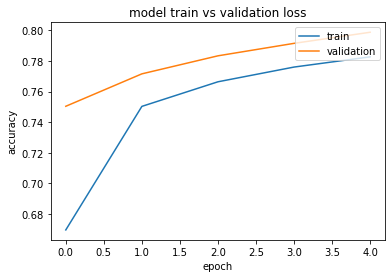

In [ ]:
from matplotlib import pyplot

pyplot.plot(history_1.history['accuracy'])
pyplot.plot(history_1.history['val_accuracy'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
text_seq_1 = tkn.texts_to_sequences(["Business management encompasses many fundamental tasks involved in the administration and operation of an organization "])
test_padded_1 = pad_sequences(text_seq_1, maxlen = max_len)
answer_1=model_1.predict(test_padded_1)
print(le.inverse_transform(onehot_encoder.inverse_transform(answer_1)))

['مدیریت']


C:\Users\admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
